# Proyecto final Talento Tech

**Estudiantes:**

Juan Sebastian Ladino Mendieta

Lizeth Daniela Castellanos Alfonso


# Punto 1
Despliegue de modelos de regresión lineal y clasificación utilizando Scikit-Learn y XGBoost

*   En estos modelos de clasificación y regresión es importante desplegar métodos de hiperparámetros como Grid Search y Random Search
*   Caso de estudio: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_palette("magma")

data = pd.read_csv('./data/Punto-1/riceClassification.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [184]:
data.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [185]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


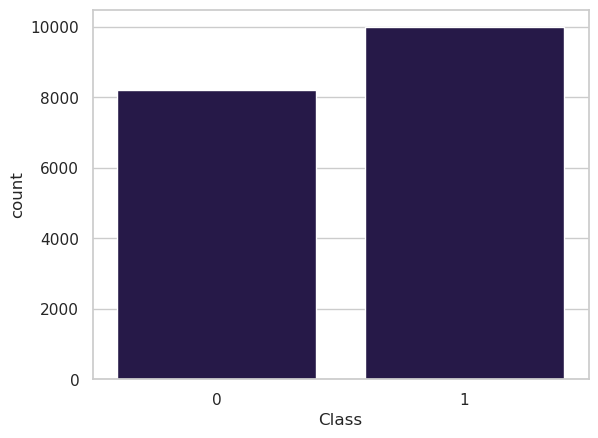

In [186]:
sns.countplot(data=data,x='Class');

### Preparación de los datos


In [187]:
data_vf=data.drop("id",axis=1)

Tenemos que dividir los datos en x y en y

In [188]:
# Eje x: Eliminamos la variable a predecir del eje x, nos referimos a las columnas axis=1
X = data_vf.drop('Class',axis=1)

# Eje y: nuestra variable a predecir
y = data_vf['Class']

print(y.value_counts(normalize=True))

Class
1    0.549079
0    0.450921
Name: proportion, dtype: float64


### Entrenar el modelo

Debemos dividir x y "y" en entrenamirnto y test

20% de los datos van a ser para evaluar el modelo
random_state=42 es una semilla que nos ayuda a aleatorizar los datos

In [189]:
from sklearn.model_selection import train_test_split

# "X" se divide en entrenamiento y test
# "y" se divide en entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print(f"X_train 80%: {X_train.shape}")
print(f"y_train 80%: {y_train.shape}")
print("\n")
print(f"X_test 20%: {X_test.shape}")
print(f"y_test 20%: {y_test.shape}")

X_train 80%: (14548, 10)
y_train 80%: (14548,)


X_test 20%: (3637, 10)
y_test 20%: (3637,)


**Normalizamos los datos**

Tenemos los datos en escalas mas cercanas para no tener rangos amplios

In [190]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Entrenar datos y transformarlos a datos normalizados o de entrenamiento
X_train_sc = sc.fit_transform(X_train)

# Solo transformamos los datos, no es necesario entrenar al modelo con estos datos porque estaríamos sesgando el modelo
X_test_sc = sc.transform(X_test)

### Regresión Logística
Vamos a realizar solo una regresión logística sin embargo es recomendado realizar varios modelos de machine learning para comparar los resultados.

In [191]:
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
# Entrenar los datos
rl.fit(X_train_sc,y_train)

# Pasamos los datos de evaluación
y_pred = rl.predict(X_test_sc)
print(y_pred)

[0 1 0 ... 1 0 0]


In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy Regresión Lineal: {X_train.shape}")
accuracy_rl_1 = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

Accuracy Regresión Lineal: (14548, 10)
0.9898267803134452


In [193]:
print(confusion_matrix(y_test,y_pred))

[[1609   23]
 [  14 1991]]


#### Selección de variables

In [194]:
from sklearn.feature_selection import RFE
rfe = RFE(rl,n_features_to_select=4)
rfe.fit(X_train_sc,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Area', False, 6),
 ('MajorAxisLength', True, 1),
 ('MinorAxisLength', True, 1),
 ('Eccentricity', False, 2),
 ('ConvexArea', True, 1),
 ('EquivDiameter', True, 1),
 ('Extent', False, 7),
 ('Perimeter', False, 4),
 ('Roundness', False, 3),
 ('AspectRation', False, 5)]

Las 4 variables mas importantes para predecir la Clase son

*   MajorAxisLength
*   MinorAxisLength
*   ConvexArea
*   EquivDiameter

### Arbol de decisión

In [195]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# el criterio puede ser log_loss o entropy
treeclass = DecisionTreeClassifier(max_depth=5,criterion="log_loss")
# entrenar modelo
treeclass.fit(X_train_sc,y_train)
# extraemos predicción
y_pred_tree = treeclass.predict(X_test_sc)

#listar predicciones
print(y_pred_tree)

[0 1 0 ... 1 0 0]


In [196]:
# variables analizadas, se conserva el orden
print(X_train.columns)

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation'],
      dtype='object')


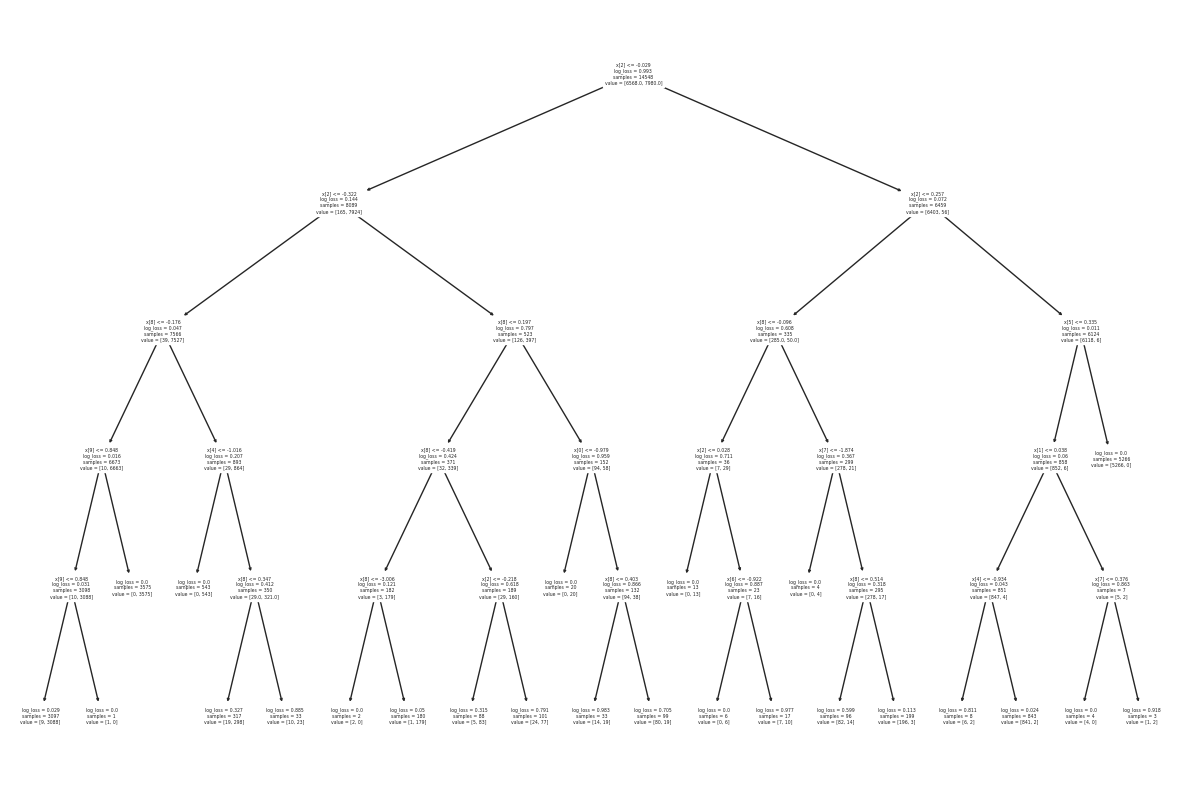

In [197]:
plt.figure(figsize=(15, 10))
plot_tree(treeclass)
plt.show()

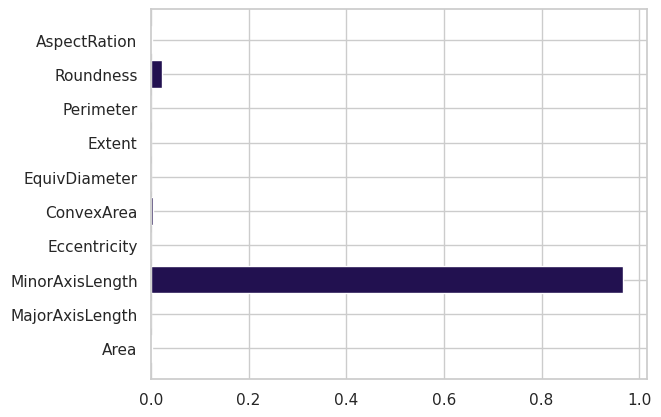

In [198]:
plt.barh(width=treeclass.feature_importances_,y=X_train.columns)
plt.show()

In [199]:
print(f"Regresión lineal: {accuracy_score(y_test,y_pred)}")
print(f"Arboles de decisión: {accuracy_score(y_test,y_pred_tree)}")

Regresión lineal: 0.9898267803134452
Arboles de decisión: 0.9887269727797635


In [200]:
print(f"Regresión lineal")
print(confusion_matrix(y_test,y_pred))

Regresión lineal
[[1609   23]
 [  14 1991]]


In [201]:
print("Arboles de decisión")
print(confusion_matrix(y_test,y_pred_tree))

Arboles de decisión
[[1605   27]
 [  14 1991]]


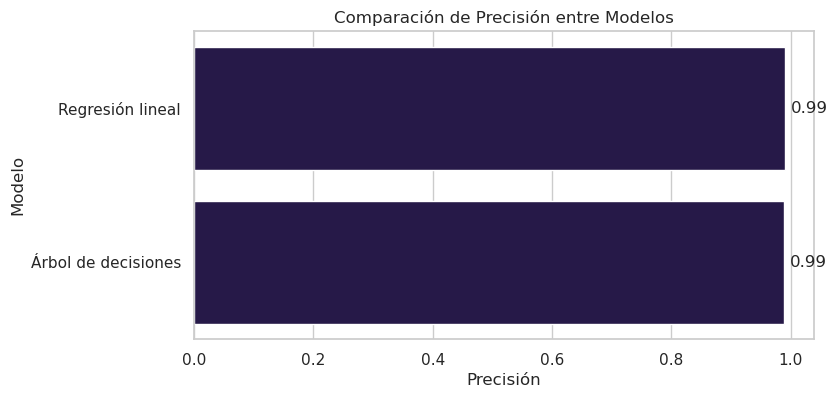

In [202]:
modelos = ['Árbol de decisiones', 'Regresión lineal']
precision = [accuracy_score(y_test,y_pred_tree), accuracy_score(y_test,y_pred)]  # Cambia los valores por las precisiones que tengas

df = pd.DataFrame({'Modelo': modelos, 'Precisión': precision})

df = df.sort_values(by='Precisión', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Precisión', y='Modelo', data=df, orient='h')

plt.xlabel('Precisión')
plt.ylabel('Modelo')
plt.title('Comparación de Precisión entre Modelos')

for i, (precision, modelo) in enumerate(zip(df['Precisión'], df['Modelo'])):
    plt.text(precision + 0.01, i, f'{precision:.2f}', va='center')  

plt.show()

# Punto 2:

Despliegue un clustering K-Means para el siguiente caso de estudio. De modo que se pueda perfilar los grupos del clúster.

*   Caso de estudio: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

# Punto 3:

Implementación de un sistema de recomendación con Scikit-surprise

*   Caso de estudio: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data?select=Ratings.csv

# Punto 4:

Desplegar para el siguiente caso de estudio un modelo de Deep learning con redes neuronales convolucionales.

*   Es importante mencionar que para este caso debe desplegar una arquitectura propia para la red neuronal convolucional.
*   Por otra parte, debe desplegar por lo menos 3 arquitecturas vistas en clase para el caso de estudio
*   Caso de estudio: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification/data

# Punto 5:

 Desplegar para el siguiente caso de estudio una red neuronal recurrente con arquitectura LSTM y otra con GRU

*   Caso de estudio: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset
*   Realizar la predicción para el precio de la columna de la Adj Close en el dataset